In [64]:
import pandas as pd

In [73]:
sub = pd.read_csv('/Users/puneetjindal/Downloads/data_science_test/boxes.csv', encoding='utf-8', index_col=0)
sub.head(2)

,subscription_id,box_id,delivered_at,started_week,count_boxes,product,channel
1,1000001,US3598,2013-01-14 00:00:00,2013-W03,1,type1,channel1
2,1000001,US3899,2013-01-21 00:00:00,2013-W03,2,type1,channel1


In [67]:
sub['delivered_at'] = pd.to_datetime(sub['delivered_at'])

In [68]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

In [69]:
sub_total_boxes = sub.groupby(['subscription_id']).agg({'count_boxes':np.max})

In [70]:
del_cnt = sub[['delivered_at','box_id']].groupby('delivered_at').agg('count')
del_cnt.index =pd.to_datetime(del_cnt.index)

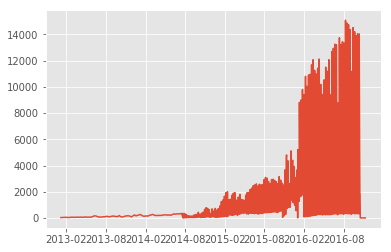

In [71]:
plt.plot(del_cnt)
plt.show()

In [83]:
last_purchase_dist = sub[['subscription_id','delivered_at','count_boxes']].groupby(['subscription_id']).agg({'delivered_at':np.max,'count_boxes':np.max})
last_purchase_dist.tail()

,count_boxes,delivered_at
subscription_id,,
1395379,1,2016-10-14 00:00:00
1395380,1,2016-10-14 00:00:00
1395381,1,2016-10-14 00:00:00
1395382,1,2016-10-14 00:00:00
1395383,1,2016-10-14 00:00:00


In [119]:
from datetime import datetime
today = datetime.today().replace(day = 7, month=11, year = 2016,hour=0,minute=0,second=0,microsecond=0)
today
last_purchase_dist['delivered_at'] =pd.to_datetime(last_purchase_dist['delivered_at'])
last_purchase_dist['time_since_last_purchase']=last_purchase_dist['delivered_at'].apply(lambda x: today - x)

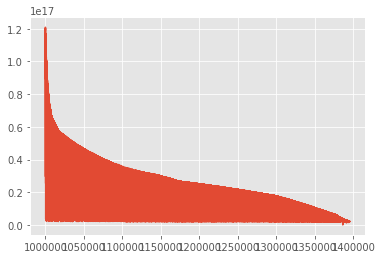

In [120]:
plt.plot(last_purchase_dist['time_since_last_purchase'])
plt.show()

In [121]:
min(last_purchase_dist['time_since_last_purchase'])

Timedelta('0 days 00:00:00')

In [122]:
max(last_purchase_dist['time_since_last_purchase'])

Timedelta('1400 days 00:00:00')

In [117]:
max(sub['delivered_at'])

u'2016-11-07 00:00:00'

In [124]:
max_min = sub.groupby('subscription_id').agg({'delivered_at':[np.min,np.max]})
max_min = max_min['delivered_at'].reset_index()
max_min['amax'] = pd.to_datetime(max_min['amax'])
max_min['amin'] = pd.to_datetime(max_min['amin'])
max_min.head()

delivered_at                     
                                amin                 amax
subscription_id                                          
1000001          2013-01-14 00:00:00  2013-01-28 00:00:00
1000002          2013-01-28 00:00:00  2013-01-28 00:00:00
1000003          2013-01-14 00:00:00  2013-01-14 00:00:00
1000004          2013-01-21 00:00:00  2013-01-28 00:00:00
1000005          2013-01-14 00:00:00  2013-01-28 00:00:00

In [150]:
max_min['purchase_gap'] = pd.tmax_min['amax'] - max_min['amin']
plt_purchase = max_min[max_min[']

In [163]:
#plt.plot(plt_purchase.sort('purchase_gap'))
#plt.show()

TypeError: invalid type comparison